
[![ebac_logo-data_science.png](https://raw.githubusercontent.com/diegobezzi/DataScience_Estudos/main/ebac-course-utils/media/logo/ebac_logo-data_science.png)](https://github.com//diegobezzi/DataScience_Estudos)
<!-- <img src="https://raw.githubusercontent.com/diegobezzi/DataScience_Estudos/main/ebac-course-utils/media/logo/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 30** | Hierárquicos / aglomerativos | Exercício 1 - Avaliando número de grupos alternativos

**Aluno:** [Diego Perez Bezzi Vilas Boas](https://www.linkedin.com/in/diegobezzi/)<br>
**Data:** 06 de agosto de 2024.

---

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
# 1. Selecione as variáveis quantitativas da base de pinguins

# Carregar um conjunto de dados de pinguins (penguins) em um DataFrame chamado 'df'.
df = sns.load_dataset('penguins')

# Filtrar o DataFrame 'df' para incluir apenas colunas que contêm tipos de dados numéricos.
df_num = df.select_dtypes(include='number')

# Imprimir informações sobre o DataFrame 'df_num', incluindo o número de colunas, o número de valores não nulos e os tipos de dados de cada coluna.
print(df_num.info())

# Exibir o DataFrame 'df_num', que agora contém apenas colunas com tipos de dados numéricos.
df_num

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB
None


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [3]:
# 2. Elimine valores faltantes

# Exibir as linhas no DataFrame 'df_num' que contêm valores faltantes (NaN).
display(df_num[df_num.isna().any(axis=1)])

# Remover as linhas com valores faltantes do DataFrame 'df_num' e atualizar o DataFrame com as alterações.
df_num.dropna(inplace=True)

# Exibir o DataFrame 'df_num' após a remoção das linhas.
df_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [5]:
# 3. Padronize as variáveis para média zero e desvio padrão 1

# Criar uma instância do objeto StandardScaler, que será usado para padronizar os dados.
scaler = StandardScaler()

# Aplicar o método fit_transform() do StandardScaler para padronizar os dados numéricos no DataFrame 'df_num'.
df_num_pad = scaler.fit_transform(df_num)

# Criar um novo DataFrame a partir dos dados padronizados e exibi-lo.
pd.DataFrame(df_num_pad)

,0,1,2,3
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
337,0.601305,-1.750171,0.931890,0.903175
338,0.527932,-1.445897,1.003109,0.809516
339,1.188289,-0.735923,1.501644,1.933419
340,0.234440,-1.192335,0.789451,1.246590


In [6]:
# 4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos

# Criar uma instância do modelo de clustering AgglomerativeClustering com os seguintes parâmetros:
    # - n_clusters: O número de clusters desejado, neste caso, definido como 3.
    # - linkage: O método de ligação utilizado para calcular a distância entre clusters. No caso, 'complete' indica ligação completa.
    # - distance_threshold: Define um limite de distância opcional, que, quando atingido, resulta na parada da aglomeração.
clustering = AgglomerativeClustering(n_clusters=3, 
                                     linkage='complete', 
                                     distance_threshold=None)

# Aplicar o modelo de clustering aos dados padronizados no DataFrame 'df_num_pad'.
clustering.fit(df_num_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [7]:
# Adicionar uma nova coluna chamada 'grupo' ao DataFrame 'df_num' para armazenar os rótulos de cluster gerados pelo modelo de clustering.
df_num['grupo'] = clustering.labels_

# Exibir o DataFrame 'df_num' com a nova coluna 'grupo' que contém as etiquetas de cluster atribuídas a cada instância de dados.
df_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,0


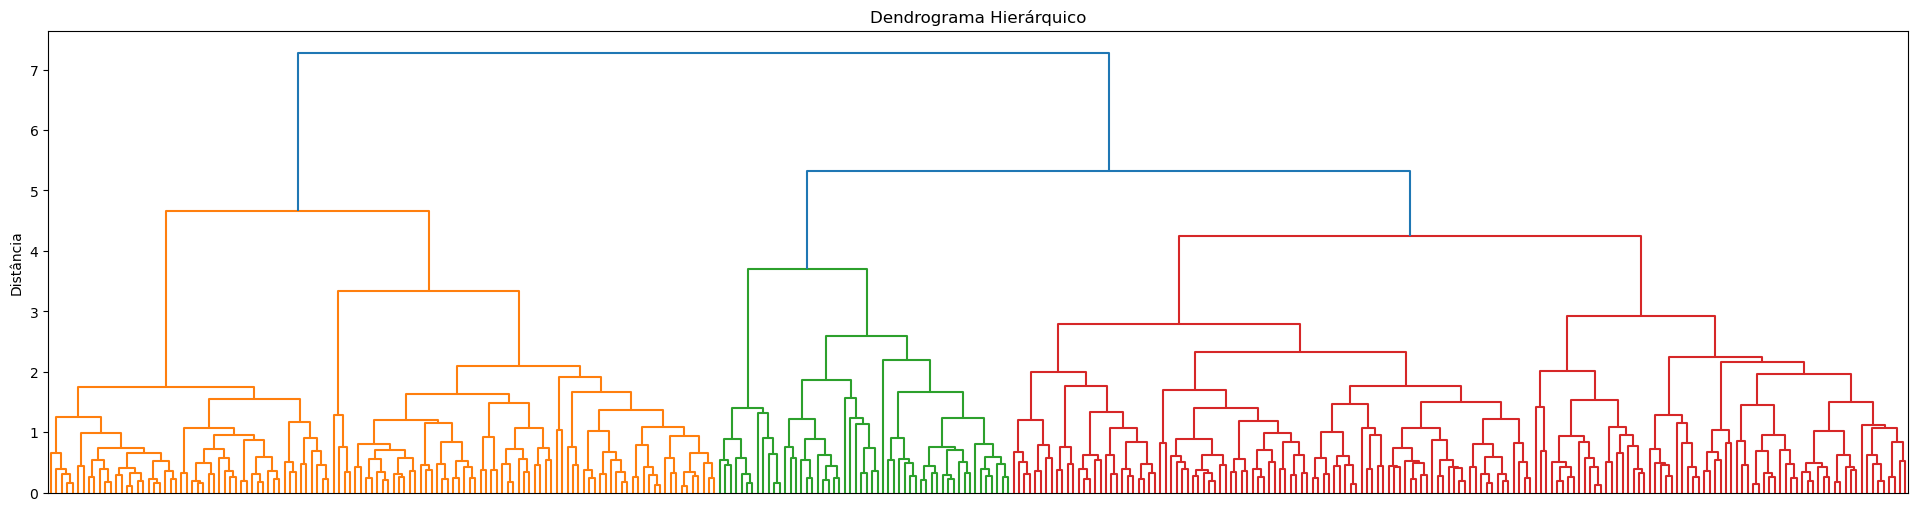

In [9]:
# 5. Faça o Dendrograma

# Definir o tamanho da figura para a plotagem do dendrograma hierárquico.
plt.figure(figsize=(24, 6))

# Calcular a matriz de ligação (linkage matrix) para o dendrograma hierárquico usando os dados padronizados em 'df_num_pad'.
Z = shc.linkage(df_num_pad, method='complete')

# Plotar o dendrograma hierárquico com as informações contidas em 'Z'.
dn = shc.dendrogram(Z)

# Definir o título do dendrograma.
plt.title('Dendrograma Hierárquico')

# Remover os marcadores no eixo x (rótulos das instâncias) para melhorar a legibilidade do dendrograma.
plt.xticks([])

# Definir o rótulo do eixo y como 'Distância'.
plt.ylabel('Distância')

# Exibir o dendrograma hierárquico.
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

Quantos pinguins de cada espécie há em cada grupo?

Grupo 0: 123 pinguins
Grupo 1: 165 pinguins
Grupo 2: 54 pinguins


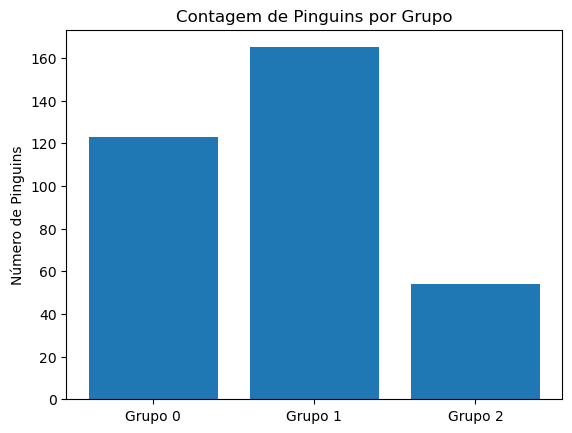

In [10]:
print('Quantos pinguins de cada espécie há em cada grupo?\n')

# Contar o número de pinguins em cada grupo e classificar os resultados por índice (rótulo do grupo).
contagem_grupos = df_num['grupo'].value_counts().sort_index()

# Usar um loop para imprimir o número de pinguins em cada grupo.
for indice, valor in enumerate(contagem_grupos):
    print('Grupo {}: {} pinguins'.format(indice, valor))

# Criar rótulos para os grupos com base nos índices dos grupos.
rotulos_grupos = [f'Grupo {grupo}' for grupo in contagem_grupos.index]

# Criar um gráfico de barras com os rótulos dos grupos e a contagem de pinguins em cada grupo.
plt.bar(rotulos_grupos, contagem_grupos)

# Adicionar rótulo ao eixo y e um título ao gráfico.
plt.ylabel('Número de Pinguins')
plt.title('Contagem de Pinguins por Grupo')

# Exibir o gráfico de barras.
plt.show()

grupo,0,1,2
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


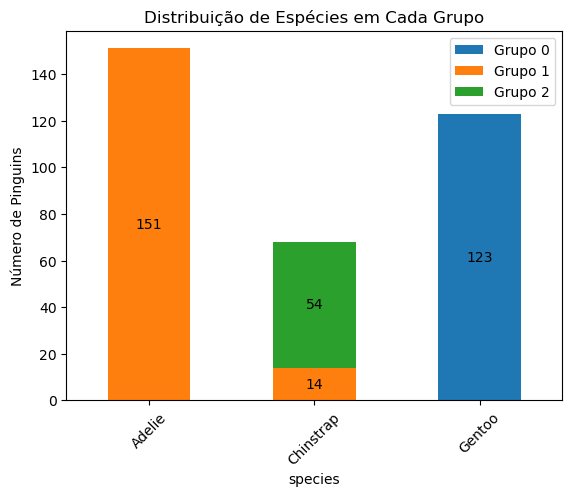

In [11]:
# Criar uma tabela cruzada (crosstab) entre as colunas 'species' e 'grupo' nos DataFrames 'df' e 'df_num'.
tabela_cruzada = pd.crosstab(df['species'], df_num['grupo'])

# Plotar a tabela cruzada como um gráfico de barras empilhadas para visualizar a distribuição de espécies em cada grupo.
ax = tabela_cruzada.plot(kind='bar', stacked=True)

# Ajustar a rotação dos rótulos no eixo x para melhorar a legibilidade.
plt.xticks(rotation=45)

# Definir o rótulo do eixo y como 'Número de Pinguins' e dar um título ao gráfico.
plt.ylabel('Número de Pinguins')
plt.title('Distribuição de Espécies em Cada Grupo')

# Adicionar uma legenda ao gráfico para identificar os grupos.
plt.legend(labels=[f'Grupo {grupo}' for grupo in tabela_cruzada.columns])

# Adicionar os números inteiros dentro de cada barra (exceto se o número for 0).
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(int(height), (x + width/2, y + height/2), ha='center', va='center')

# Exibir a tabela cruzada como uma tabela no formato tabular.
display(tabela_cruzada)

# Exibir o gráfico de barras empilhadas com a quantidade dentro de cada grupo.
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

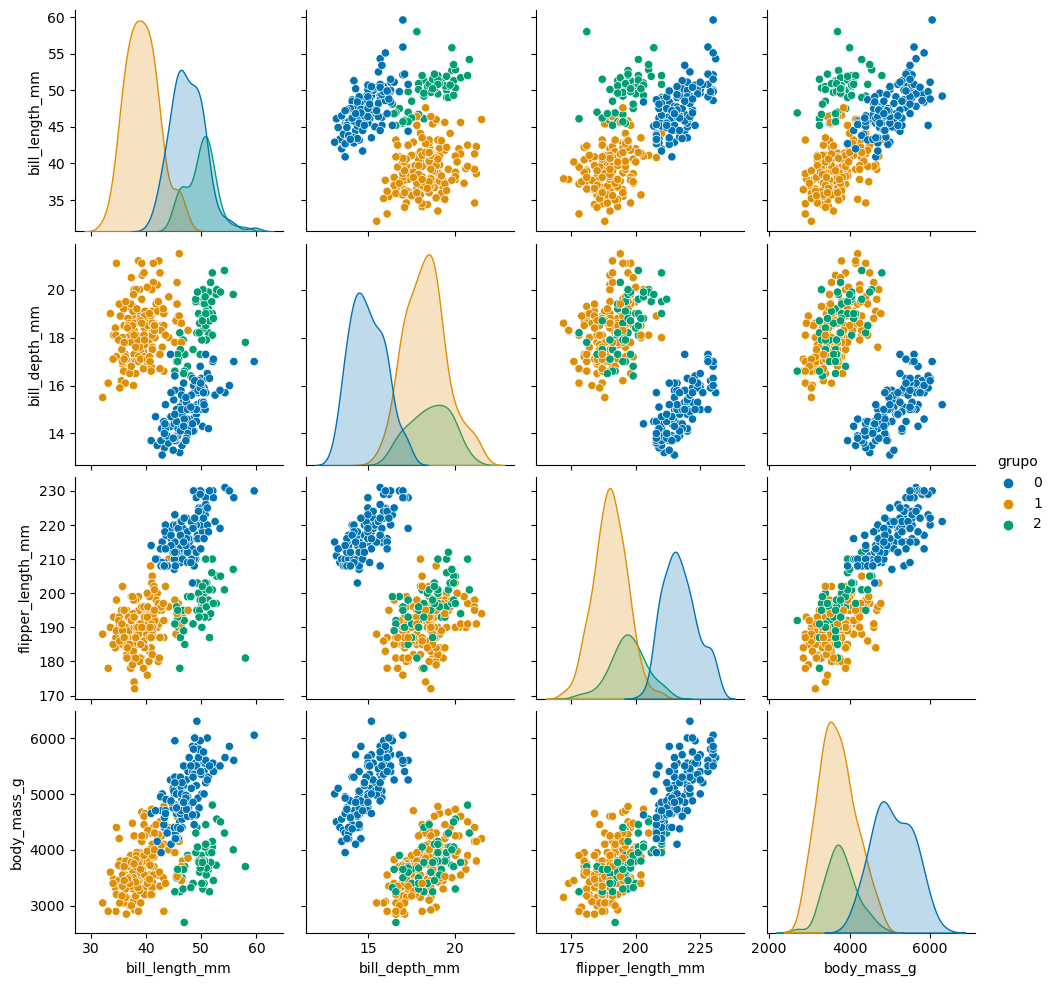

In [12]:
# Usar a biblioteca Seaborn para criar um gráfico de matriz de dispersão (pair plot) com os dados em 'df_num'.
# A opção 'hue' é usada para colorir os pontos com base na coluna 'grupo'.
# A opção 'palette' define a paleta de cores a ser usada para os grupos.
sns.pairplot(data=df_num, hue='grupo', palette='colorblind');

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

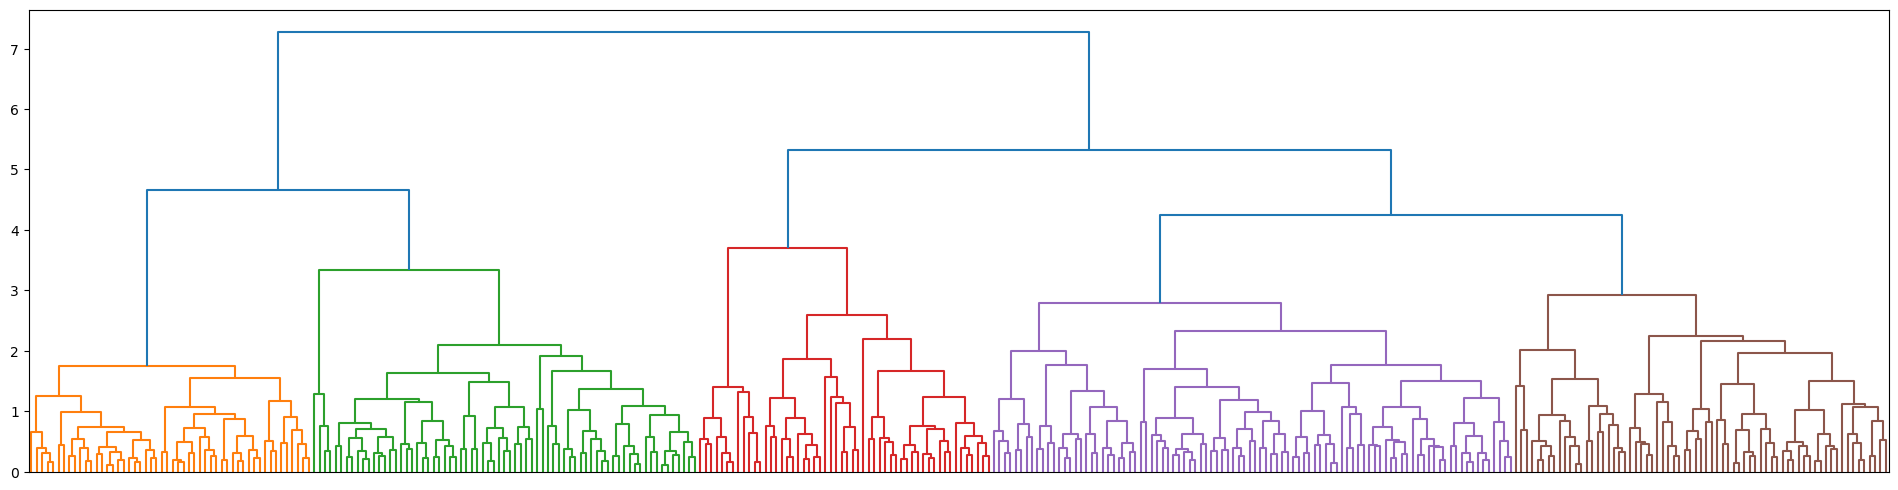

In [14]:
# Configurar o tamanho da figura para o dendrograma.
plt.figure(figsize=(24, 6))

# Calcular a ligação hierárquica usando o método de ligação 'complete' nos dados padronizados em 'df_num_pad'.
Z = shc.linkage(df_num_pad, method='complete')

# Plotar o dendrograma usando os resultados da ligação hierárquica.
# A opção 'color_threshold' define um limite de cor para destacar os clusters.
dn = shc.dendrogram(Z, color_threshold=3.8)

# Remover os rótulos do eixo x para melhorar a legibilidade.
plt.xticks([])

# Exibir o dendrograma hierárquico.
plt.show()

In [15]:
# Criar uma instância do modelo de clustering AgglomerativeClustering com 6 clusters,
# método de ligação 'complete' e sem limite de distância.
clustering = AgglomerativeClustering(n_clusters=5, linkage='complete', distance_threshold=None)

# Aplicar o modelo de clustering aos dados padronizados no DataFrame 'df_num_pad'.
clustering.fit(df_num_pad)

# Adicionar uma nova coluna chamada 'subgrupo' ao DataFrame 'df_num' para armazenar as etiquetas de subgrupo geradas pelo modelo de clustering.
df_num['subgrupo'] = clustering.labels_

# Exibir o DataFrame 'df_num' com a nova coluna 'subgrupo' que contém as etiquetas de subgrupo atribuídas a cada instância de dados.
df_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo,subgrupo
0,39.1,18.7,181.0,3750.0,1,4
1,39.5,17.4,186.0,3800.0,1,4
2,40.3,18.0,195.0,3250.0,1,4
4,36.7,19.3,193.0,3450.0,1,4
5,39.3,20.6,190.0,3650.0,1,2
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,3
340,46.8,14.3,215.0,4850.0,0,3
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,0,3


Quantos pinguins de cada espécie há em cada grupo?

Subgrupo 0: 54 pinguins
Subgrupo 1: 71 pinguins
Subgrupo 2: 69 pinguins
Subgrupo 3: 52 pinguins
Subgrupo 4: 96 pinguins


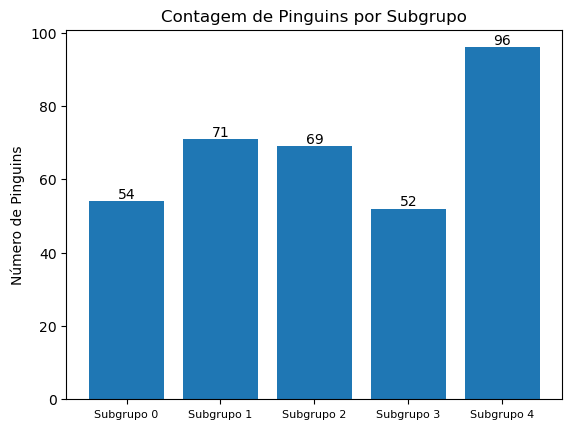

In [16]:
print('Quantos pinguins de cada espécie há em cada grupo?\n')

# Contar o número de pinguins em cada subgrupo e classificar os resultados por índice (rótulo do subgrupo).
contagem_subgrupos = df_num['subgrupo'].value_counts().sort_index()

# Usar um loop para imprimir o número de pinguins em cada subgrupo.
for indice, valor in enumerate(contagem_subgrupos):
    print('Subgrupo {}: {} pinguins'.format(indice, valor))

# Criar rótulos para os subgrupos com base nos índices dos subgrupos.
rotulos_subgrupos = [f'Subgrupo {grupo}' for grupo in contagem_subgrupos.index]

# Criar um gráfico de barras com os rótulos dos subgrupos e a contagem de pinguins em cada subgrupo.
plt.bar(rotulos_subgrupos, contagem_subgrupos)

# Adicionar um título ao gráfico, rótulo ao eixo y e ajustar o tamanho dos rótulos no eixo x.
plt.title('Contagem de Pinguins por Subgrupo')
plt.ylabel('Número de Pinguins')
plt.xticks(fontsize=8)

# Adicionar as quantidades dentro de cada coluna do gráfico de barras.
for i, v in enumerate(contagem_subgrupos):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Exibir o gráfico de barras.
plt.show()

Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?


sex,Female,Male
subgrupo,,
0,20,34
1,9,61
2,13,55
3,49,0
4,74,18



Tabela cruzada percentual:


C:\Users\User\AppData\Local\Temp\ipykernel_9964\2938470464.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(tabela_cruzada_percentual.applymap(lambda x: f'{x:.2f}%'))


species   Adelie         Chinstrap          Gentoo        
sex       Female    Male    Female    Male  Female    Male
subgrupo                                                  
0          0.00%   0.00%     6.01%  10.21%   0.00%   0.00%
1          0.00%   0.00%     0.00%   0.00%   2.70%  18.32%
2          1.20%  16.52%     2.70%   0.00%   0.00%   0.00%
3          0.00%   0.00%     0.00%   0.00%  14.71%   0.00%
4         20.72%   5.41%     1.50%   0.00%   0.00%   0.00%

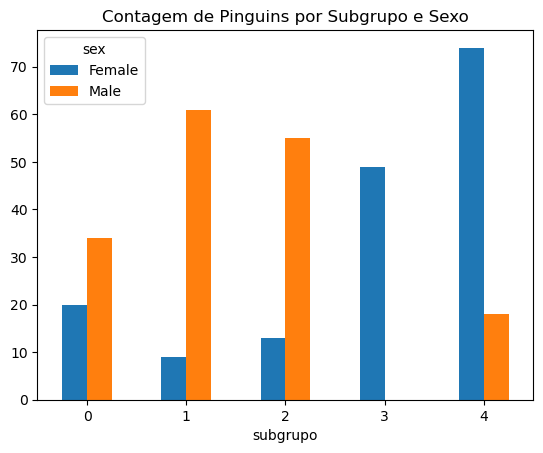

In [17]:
# Mesclar o DataFrame 'df_num' com as colunas 'sex' e 'species' do DataFrame original 'df' usando o índice como chave de mesclagem.
df_ = df_num.merge(right=df[['sex', 'species']], how='left', left_index=True, right_index=True)

# Contar a frequência dos pares de valores nas colunas 'subgrupo' e 'sex' usando a função value_counts.
# Em seguida, desempilhar o resultado para criar uma tabela cruzada.
# Qualquer valor ausente (NaN) é preenchido com zero (0) e os valores são convertidos para inteiros.
contagem_subgrupo_sex = (df_[['subgrupo', 'sex']].value_counts().unstack().fillna(0).astype(int))

print('Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?')

# Exibir a tabela cruzada com a contagem de pinguins por subgrupo e sexo.
display(contagem_subgrupo_sex)

print('\nTabela cruzada percentual:')

# Calcular a tabela cruzada percentual das espécies por subgrupo e sexo.
tabela_cruzada_percentual = pd.crosstab(index=[df_['subgrupo'], df_['sex']], columns=df_['species'], normalize=True) * 100
tabela_cruzada_percentual = tabela_cruzada_percentual.unstack().fillna(0)

# Exibir a tabela cruzada percentual com valores formatados para duas casas decimais.
display(tabela_cruzada_percentual.applymap(lambda x: f'{x:.2f}%'))

# Plotar a tabela cruzada como um gráfico de barras.
contagem_subgrupo_sex.plot(kind='bar')

# Adicionar um título ao gráfico, definir a rotação dos rótulos no eixo x e exibir o gráfico de barras.
plt.title('Contagem de Pinguins por Subgrupo e Sexo')
plt.xticks(rotation=0)
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

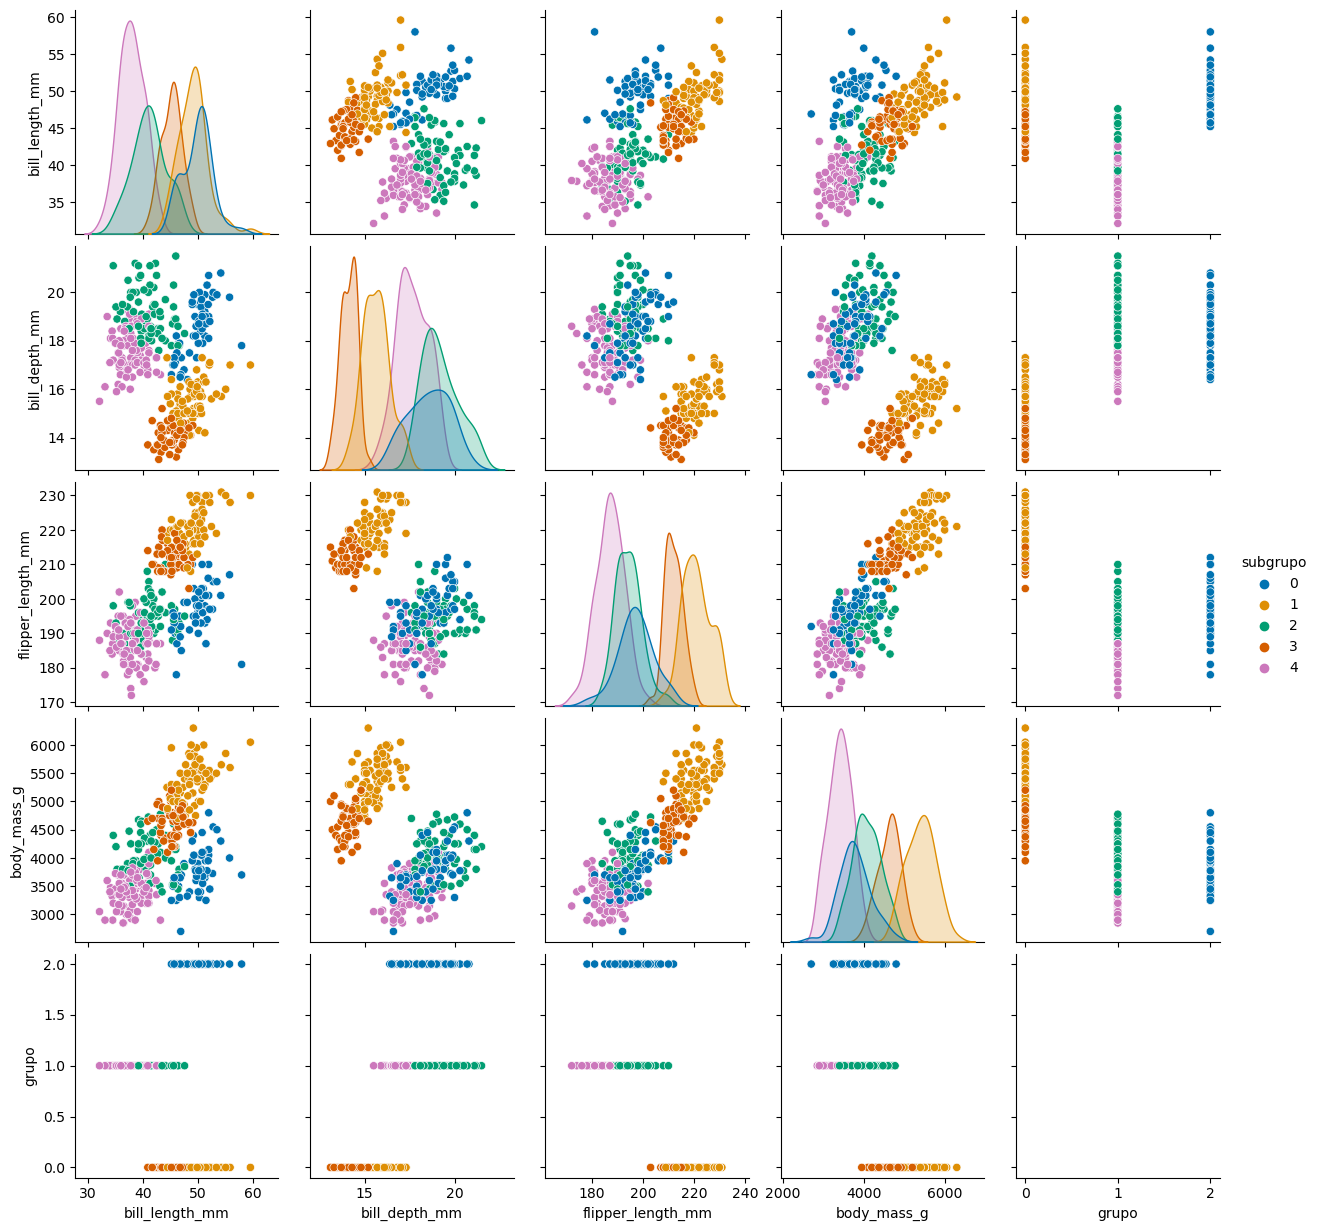

In [18]:
# Criar um pair plot (gráfico de pares) usando o DataFrame 'df_'.
# A opção 'hue' é usada para colorir os pontos com base no novo agrupamento.
# A opção 'palette' define a paleta de cores a ser usada.
sns.pairplot(data=df_, hue='subgrupo', palette='colorblind');

Na minha opinião, o novo agrupamento hierárquico em que foram definidos 5 grupos (n-clusters) parece capturar alguns padrões naturais nos dados. Observando a tabela cruzada percentual, podemos relacionar os grupos resultantes com as variáveis da base original, como espécie e sexo dos pinguins.  
Os grupos podem ser classificados da seguinte forma:

| Grupo   | Espécie   | Sexo          |
| :-----: | :-------- | :------------ |
| 0       | Chinstrap | Macho / Fêmea |
| 1       | Gentoo    | Macho         |
| 2       | Adelie    | Macho         |
| 3       | Gentoo    | Fêmea         |
| 4       | Adelie    | Fêmea         |

Essa classificação sugere que o agrupamento capturou alguns padrões naturais nos dados, pois os grupos separam os pinguins com base em suas características de espécie e sexo. Por exemplo, o "Grupo 0" inclui pinguins da espécie Chinstrap, tanto machos quanto fêmeas, enquanto o "Grupo 1" inclui principalmente pinguins da espécie Gentoo do sexo masculino. Isso indica que o agrupamento foi capaz de separar os pinguins com base em características biológicas distintas. No entanto, a interpretação final depende dos objetivos e do contexto específico da análise.

---